# Multi-Layer Perceptron in Tensorflow

Multi-layer perception is fully a connected dense network with multiple layers, which transform any input dimension to the desired dimension. To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons.

Every node in the multi-layer perception uses a sigmoid activation function. The sigmoid activation function takes real values as input and converts them to numbers between 0 and 1 using the sigmoid formula.

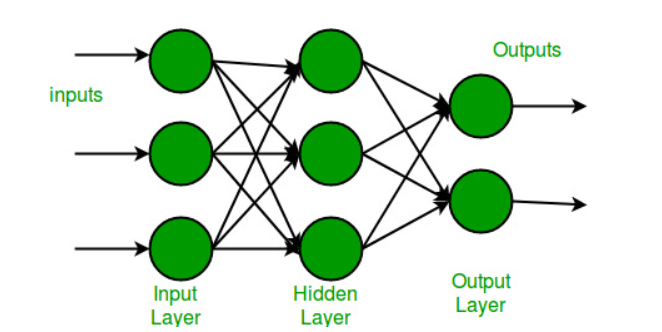


The above network has three inputs and thus three input nodes and one hidden layer with three nodes. The output layer gives two outputs, therefore there are two output nodes. 

### This notebook presents a multi-layer perceptron in case of binary classification using sigmoid activation

## Stepwise Implementation:


### 1. Import the necessary libraries

In [ ]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt 

### 2. Load the MNIST dataset from keras library

TensorFlow allows us to read the MNIST dataset and we can load it directly in the program as a train and test dataset.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

### 3. Convert the pixels into floating-point values

The pixel values range from 0 to 256, apart from 0 the range is 255. Dividing all the values by 255 to convert the range from 0 to 1.

Converting the pixel values into floating-point values helps in computation becomes easier and faster. 


In [ ]:
# Cast the records into float values 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
  
# normalize image pixel values by dividing  
# by 255 
gray_scale = 255
x_train /= gray_scale 
x_test /= gray_scale

### 4. Prepare the binary dataset for classification

In [ ]:
# For binary classification, we'll limit the dataset to digits '0' and '1'
binary_train_mask = np.isin(y_train, [0, 1])
binary_test_mask = np.isin(y_test, [0, 1])

x_train_binary = x_train[binary_train_mask]
y_train_binary = y_train[binary_train_mask]

x_test_binary = x_test[binary_test_mask]
y_test_binary = y_test[binary_test_mask]

# Reshape labels to make it binary (0 and 1)
y_train_binary = np.where(y_train_binary == 1, 1, 0)
y_test_binary = np.where(y_test_binary == 1, 1, 0)

In [ ]:
print("Training data:", x_train_binary.shape) 
print("Test data:", x_test_binary.shape) 
print("Training label data:", y_train_binary.shape) 
print("Test label data:", y_test_binary.shape) 

In total, there are 60,000 records out of it 12665 are used for binary classification in the training dataset. Test dataset has 10,000 records, out of them 2115 are used for the binary classification. The size of every image is 28×28

### 5. Visualize the data

In [ ]:
fig, ax = plt.subplots(10, 10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(x_train_binary[k].reshape(28, 28),  
                        aspect='auto') 
        k += 1
plt.show() 

### 6. Define the network

In [ ]:
model = Sequential([ 
    
    # reshape 28 row * 28 column data to 28*28 rows 
    Flatten(input_shape=(28, 28)), 
    
      # hidden dense layer 1 
    Dense(128, activation='relu', name='L1'),   
    
    # hidden dense layer 2 
    Dense(64, activation='relu', name='L2'),  
    
      # output layer 
    Dense(1, activation='sigmoid', name='L3'),   ## prefer sigmoid activation for binary classification 
]) 

The Sequential model creates the model layer-by-layer as needed in a multi-layer perceptron, with a sigmoid activation function at each of the layers.

In [ ]:
model.summary()

#### Get the weights and bias for each layer

In [ ]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
W3, b3 = model.get_layer("L3").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)
print(f"W3{W3.shape}:\n", W3, f"\nb3{b3.shape}:", b3)

### 7. Compile the model

The model.compile statement defines a loss function and specifies a compile optimization.


In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

### 8. Fit the model

The model.fit statement runs gradient descent and fits the weights to the data.

In [ ]:
history= model.fit(x_train_binary, y_train_binary, epochs=10, batch_size=32, validation_data=(x_test_binary, y_test_binary))

In [ ]:
# Examine the change in weights and biases at each layer
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
W3, b3 = model.get_layer("L3").get_weights()

print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)
print(f"W3{W3.shape}:\n", W3, f"\nb3{b3.shape}:", b3)

### 9. Find Accuracy and loss for the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test_binary,  y_test_binary, verbose = 1) 
print('test loss, test acc:', test_loss, test_acc)

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 10. Evalaute other performance metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict class probabilities for the test data
y_pred_probs = model.predict(x_test_binary)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test_binary, y_pred, average='macro')
recall = recall_score(y_test_binary, y_pred, average='macro')
f1 = f1_score(y_test_binary, y_pred, average='macro')

# Print the metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
